# Signals

Here we will be describing and simulating 5 different types of signals that cover the range of what we typically work with in bioacoustics. These will be:

1. [White noise](#White-noise)  
2. [Sine wave](#Sine-wave)  
3. [Single pulse](#Pulse)    
4. [Pulse train](#Pulse-train)  
5. [Chirp](#Chirp)  

## Common parameters

Before we begin, let's define a set of common parameters (e.g., duration, amplitude, frequency, etc.) that we'll use to model these signals.

In [5]:
% inputs
a = 1;          % signal amplitude [uPa]
f = 200;        % signal frequency [Hz]
d = 1;          % signal duration [sec]
Fs = 44.1e3;    % sampling frequency [samples/sec]

% calculated parameters
dt = 1/Fs;      % sample interval [sec/sample]
t = 0:dt:d-dt;  % timesteps of signal [sec]
n = length(t);  % length of signal [samples]

## White noise

White noise is simply a random signal with equal energy at all frequencies. It's commonly described as 'static'. In many signal processing applications this kind of signal is undesirable and something that we try to reduce or eliminate. 

We can generated it using the `randn()` function in Matlab as follows:

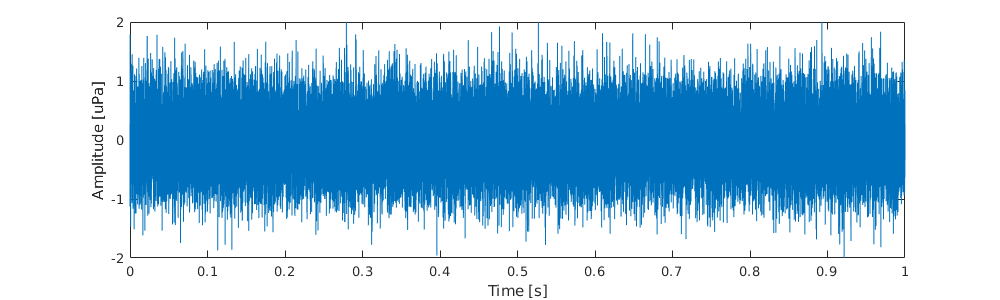

In [6]:
%plot -s 1000,300

% create signal
y = a/2*randn(1,n);

% plot waveform
plot(t, y)
ylim([-max(a) max(a)]*2)
xlabel('Time [s]')
ylabel('Amplitude [uPa]')

% write audio file
y = 2*(y-min(y))/(max(y)-min(y))-1; % normalize to (-1, 1) 
audiowrite('files/noise.wav',y,Fs)

<audio src="files/noise.wav" controls>Audio not supported :(</audio>

Here is a link to the [audio](files/noise.wav)

## Sine wave

Sine waves are perhaps the most important signal in our lexicon for the simple reason that any sound can be represented by a superposition of many sine waves. A single sine wave is a pure tone with energy at a specific frequency. A common example would be a guitar tuner playing the note A at 440 Hz. These may also be a good simple representation of tonal noise from a ship's propeller.

We can conveniently model a sine wave in Matlab using the `sin()` function like this:

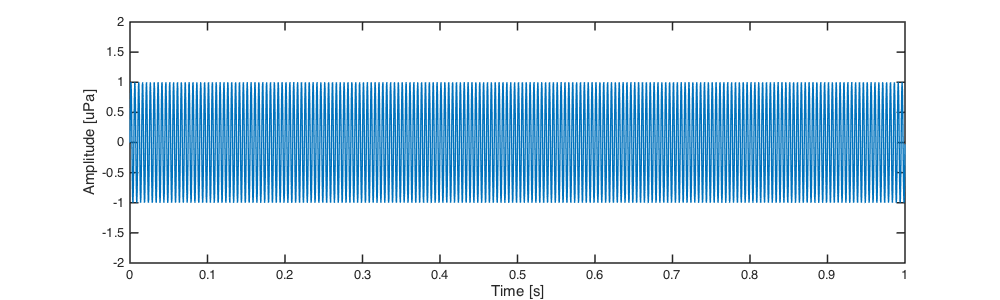

In [3]:
%plot -s 1000,300

% create signal
y = a*sin(2*pi*f*t);

% plot
plot(t, y)
ylim([-max(a) max(a)]*2)
xlabel('Time [s]')
ylabel('Amplitude [uPa]')

% write file
y = 2*(y-min(y))/(max(y)-min(y))-1; % normalize to (-1, 1) 
audiowrite('files/sine.wav',y,Fs)

<audio src="files/sine.wav" controls>Audio not supported :(</audio>

Here is a link to the [audio](files/sine.wav)

## Pulse

A pulse is an impulsive sound, like a hand knocking a table. These kinds of signals are everywhere.

We use the `gauspuls()` function to make them in Matlab:

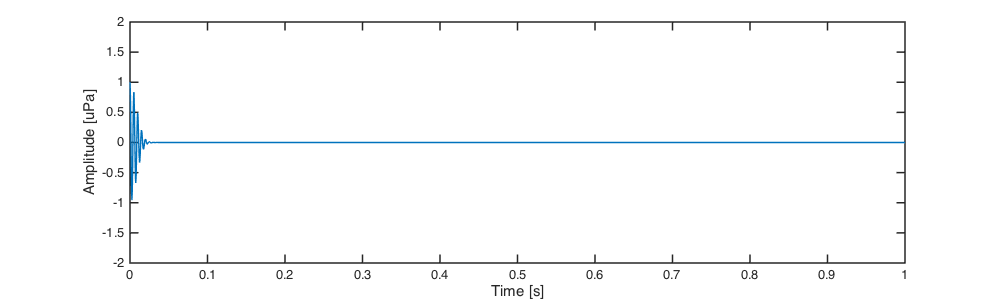

In [4]:
%plot -s 1000,300

% create signal
y = a*gauspuls(t,f,0.5,-30);

% plot
plot(t, y)
ylim([-max(a) max(a)]*2)
xlabel('Time [s]')
ylabel('Amplitude [uPa]')

% write file
y = 2*(y-min(y))/(max(y)-min(y))-1; % normalize to (-1, 1) 
audiowrite('files/pulse.wav',y,Fs)

<audio src="files/pulse.wav" controls>Audio not supported :(</audio>

Here is link to the [audio](files/pulse.wav)

## Pulse train

Repeated pulses, or pulse trains, are a very common way to convery information. Echolocations clicks, such as those produced by sperm and killer whales, are a great example of pulse trains in ocean bioacoustics.

The following example shows how to create a pulse train by stringing together several single pulses 'by hand', but there are are certainly other (perhaps better) ways of doing it:

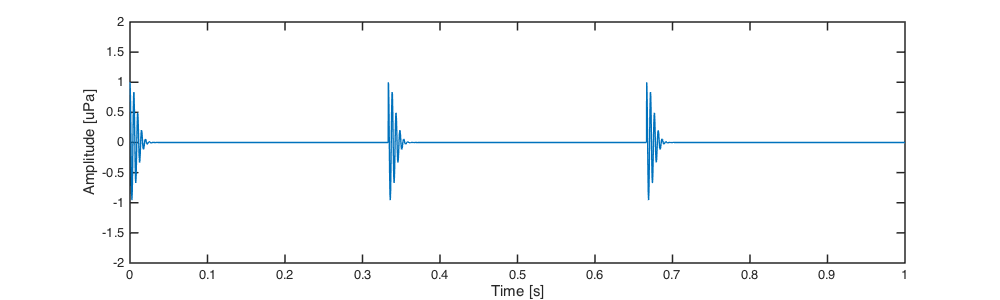

In [5]:
%plot -s 1000,300

% create signal
npls = 3; % number of pulses
y_pulse = a*gauspuls(t,f,0.5,-30); % single pulse
pls = y_pulse(1:floor(n/npls)); % crop single pulse
pls = repmat(pls,1,npls); % repeat single pulse
y = zeros(1,n); % allocate signal array
y(1:length(pls)) = pls; % combine array

% plot
plot(t, y)
ylim([-max(a) max(a)]*2)
xlabel('Time [s]')
ylabel('Amplitude [uPa]')

% write file
y = 2*(y-min(y))/(max(y)-min(y))-1; % normalize to (-1, 1) 
audiowrite('files/pulsetrain.wav',y,Fs)

<audio src="files/pulsetrain.wav" controls>Audio not supported :(</audio>

Here is link to the [audio](files/pulsetrain.wav)

## Chirp

A chirp refers to a frequency-modulated signal (a signal with a frequency that changes over time). A common example might be the sound of a siren from an ambulance or police car.

We can easily create a chirp in Matlab using the `chirp()` function like this:

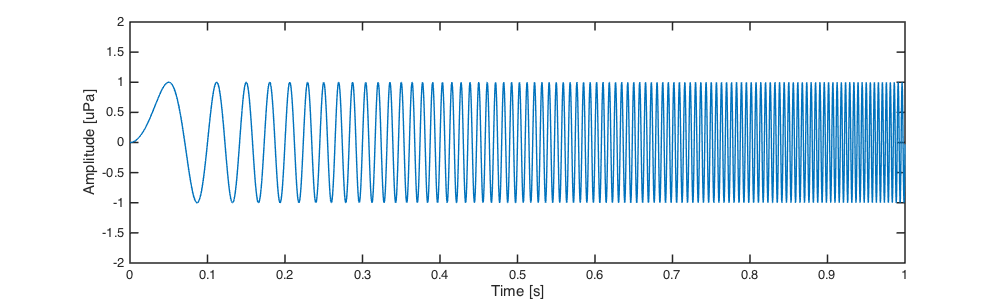

In [6]:
%plot -s 1000,300

% create signal
y = chirp(t,0,d,f,'linear', -90);

% plot
plot(t, y)
ylim([-max(a) max(a)]*2)
xlabel('Time [s]')
ylabel('Amplitude [uPa]')

% write file
y = 2*(y-min(y))/(max(y)-min(y))-1; % normalize to (-1, 1) 
audiowrite('files/chirp.wav',y,Fs)

<audio src="files/chirp.wav" controls>Audio not supported :(</audio>

Here is link to the [audio](files/chirp.wav)

## Summary

In this section we've described 5 common signals in bioacoustics, and learned how to create and plot their waveforms in Matlab. We will refer to these signals often throughout the rest of this guide, and use them to illustrate a variety of different concepts.
